In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.metrics import *
from IPython.display import Image

In [4]:
cred = pd.read_csv('crx.data', delimiter=',', names = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','y'])

In [5]:
cred.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,y
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Check if any missing value

In [6]:
cred.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
o    0
y    0
dtype: int64

In [7]:
cred.ix[:,5].unique()

array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
       'j', '?'], dtype=object)

In [8]:
### Replace 
cred['b'] = cred['b'].replace('?', np.nan)
cred['b'] = cred['b'].astype(float)

In [9]:
cred.mean()

b      31.568171
c       4.758725
h       2.223406
k       2.400000
o    1017.385507
dtype: float64

In [10]:
cred.loc[:, 'b'] = cred.fillna(cred.mean()['b'])

###Check if any data type is non numeric

In [11]:
cred.dtypes

a     object
b    float64
c    float64
d     object
e     object
f     object
g     object
h    float64
i     object
j     object
k      int64
l     object
m     object
n     object
o      int64
y     object
dtype: object

###Generate Dummies For non-numeric variables 

In [12]:
categorical_var = ['a','d','e','f','g','i','j','l','m','n']
cred = pd.get_dummies(cred, columns = categorical_var)

###Replace + with 1 and - with 0

In [13]:
cred.ix[cred['y'] =='+', 'y'] = 1
cred.ix[cred['y'] =='-', 'y'] = 0

In [14]:
cred['y'] = cred['y'].astype(int)

###Building a Supervised Learning Model

In [15]:
y = cred['y'].values
X =cred.drop('y', 1)
X = X.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

####Logistic Regression

In [17]:
clf = LogisticRegression(C=1.0, penalty='l2', tol=1)

In [18]:
y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [19]:
metrics.roc_auc_score(y_test, y_pred_probs)

0.67763532763532741

In [157]:
k = 0.5
threshold = np.sort(y_pred_probs)[::-1][int(k*len(y_pred_probs))]
y_pred = np.asarray([1 if i >= threshold else 0 for i in y_pred_probs])
metrics.confusion_matrix(y_test, y_pred)

array([[65, 52],
       [38, 52]])

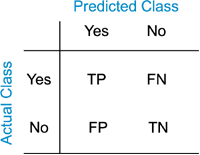

In [2]:
Image(filename='confusionmatrix.png')

In [142]:
y_pred_probs

array([ 0.49999896,  0.52255454,  0.49999939,  0.60251052,  0.50002158,
        0.50263886,  0.49999924,  0.58931439,  0.50002192,  0.49999912,
        0.51263532,  0.49999923,  0.49999913,  0.49999934,  0.49999923,
        0.52264468,  0.52233031,  0.53838402,  0.59086506,  0.56730218,
        0.51732688,  0.50004452,  0.49999936,  0.49999937,  0.50534753,
        0.52255502,  0.49999964,  0.49999879,  0.49999932,  0.55625557,
        0.50002095,  0.5313546 ,  0.52401859,  0.49999876,  0.49999892,
        0.50390425,  0.5078986 ,  0.50708483,  0.5662821 ,  0.53155576,
        0.49999874,  0.49999877,  0.50072164,  0.49999944,  0.49999917,
        0.49999876,  0.49999904,  0.49999844,  0.50006684,  0.49999935,
        0.49999935,  0.50112729,  0.4999997 ,  0.4999992 ,  0.49999919,
        0.52255431,  0.54942438,  0.50008929,  0.49999906,  0.50221138,
        0.49999872,  0.50002152,  0.50225469,  0.50713047,  0.49999891,
        0.50011228,  0.49999849,  0.51804822,  0.49999909,  0.50

#### Random Forest

In [159]:
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0) 

In [160]:
y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [161]:
metrics.roc_auc_score(y_test, y_pred_probs)

0.90702754036087363

In [162]:
k = 0.5
threshold = np.sort(y_pred_probs)[::-1][int(k*len(y_pred_probs))]
y_pred = np.asarray([1 if i >= threshold else 0 for i in y_pred_probs])
metrics.confusion_matrix(y_test, y_pred)

array([[93, 24],
       [10, 80]])

Random Forest performs significantly better than Logistic Regression suggesting presence of nonlinearity

###Feature Importance

In [165]:
importances = clf.fit(X_train, y_train).feature_importances_
indices = np.argsort(importances)[::-1]

In [166]:
X = cred.drop('y', 1)
X.columns[indices]

Index(['i_f', 'i_t', 'k', 'h', 'c', 'o', 'b', 'j_f', 'j_t', 'e_p', 
       ...
       'n_00434', 'n_00141', 'n_00371', 'n_00443', 'n_00450', 'n_00043',
       'n_00163', 'n_00470', 'n_00174', 'n_00454'],
      dtype='object', length=221)